
Environment Set-up

In [ ]:
!pip install h5py tables kaggle mne
!pip install --upgrade imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 32.0 MB/s eta 0:00:00


In [ ]:
import os                         # for file locations
import matplotlib.pyplot as plt   # for plotting
import numpy as np                # arrays
import pickle                     # saving python objects
import pandas as pd               # dataframes
import tables

# colours for printing outputs
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [ ]:
# Define the FILE_PATH variable with the actual path to your HDF5 file
FILE_PATH = "/content/Patient_2_features.h5"  # Replace with the correct path

# load features dataframe
h5file = tables.open_file(FILE_PATH, mode="r+")
h5file

File(filename=/content/Patient_2_features.h5, title='Patient 2 Features', mode='r+', root_uep='/', filters=Filters(complevel=0, shuffle=False, bitshuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) 'Patient 2 Features'
/Patient_2 (Group) 'Participant Data'
/Patient_2/Data_x (EArray(7035, 848)) 'Feature Array'
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (9, 848)
/Patient_2/Data_x_Feat_Names (Array(848,)) 'Names of Each Feature'
  atom := StringAtom(itemsize=29, shape=(), dflt=b'')
  maindim := 0
  flavor := 'numpy'
  byteorder := 'irrelevant'
  chunkshape := None
/Patient_2/Data_y (EArray(7035, 1)) 'Events Array'
  atom := Int64Atom(shape=(), dflt=0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (8192, 1)

In [ ]:
data_x = h5file.get_node('/Patient_2/Data_x')
data_y = h5file.get_node('/Patient_2/Data_y')
data_x_labels = h5file.get_node('/Patient_2/Data_x_Feat_Names')

part_feature_df = pd.DataFrame(data_x[:], columns = data_x_labels[:].astype(str))
part_feature_df['class'] = data_y[:]
part_feature_df = part_feature_df.set_index('class')
part_feature_df.head()

,LMacro_01|2_4Hz,LMacro_01|4_8Hz,LMacro_01|8_12Hz,LMacro_01|12_30Hz,LMacro_01|30_70Hz,LMacro_01|Ratio_3_12/2_30Hz,LMacro_01|D6_mean,LMacro_01|D5_mean,LMacro_01|D4_mean,LMacro_01|D3_mean,...,RMacro_04_RMacro_05|time_corr,RMacro_04_RMacro_06|time_corr,RMacro_04_RMacro_07|time_corr,RMacro_04_RMacro_08|time_corr,RMacro_05_RMacro_06|time_corr,RMacro_05_RMacro_07|time_corr,RMacro_05_RMacro_08|time_corr,RMacro_06_RMacro_07|time_corr,RMacro_06_RMacro_08|time_corr,RMacro_07_RMacro_08|time_corr
class,,,,,,,,,,,,,,,,,,,,,
1,227.771604,121.729376,104.748192,12.558394,0.647189,0.236310,-1.464481,-0.824742,0.013091,0.079837,...,0.273753,0.363735,0.389202,0.297462,0.789810,0.652605,0.519944,0.953851,0.796902,0.888274
1,162.957202,77.334727,39.298664,159.289935,17.511810,0.521757,-0.524147,-2.195927,0.170249,0.077665,...,0.402350,0.379938,0.046323,-0.029894,0.765875,0.426919,0.379509,0.808733,0.732159,0.911896
1,7.328949,42.812358,74.461760,98.214038,8.702826,0.631694,4.117210,-0.597011,-0.399529,0.090689,...,-0.020415,-0.103571,-0.071538,-0.048586,0.807652,0.638780,0.563594,0.936139,0.864730,0.954777
1,213.279844,85.966538,48.585487,241.390643,19.657826,1.773919,1.079959,0.292291,0.022378,0.049902,...,-0.194032,-0.129580,0.018119,0.232352,0.842868,0.673148,0.445052,0.857085,0.559804,0.861035
1,44.163924,27.442250,42.136054,177.165579,15.002302,1.353723,-1.712907,1.431398,-0.246839,-0.003639,...,0.099375,0.115953,0.158055,0.105109,0.680998,0.362963,0.242693,0.834629,0.653866,0.911919


Data Preparation

In [ ]:
part_feature_df.index.value_counts()

,count
class,
2,3894
0,2990
1,151


In [ ]:
reduced_features = part_feature_df.loc[[0,1]]
reduced_features.head()

,LMacro_01|2_4Hz,LMacro_01|4_8Hz,LMacro_01|8_12Hz,LMacro_01|12_30Hz,LMacro_01|30_70Hz,LMacro_01|Ratio_3_12/2_30Hz,LMacro_01|D6_mean,LMacro_01|D5_mean,LMacro_01|D4_mean,LMacro_01|D3_mean,...,RMacro_04_RMacro_05|time_corr,RMacro_04_RMacro_06|time_corr,RMacro_04_RMacro_07|time_corr,RMacro_04_RMacro_08|time_corr,RMacro_05_RMacro_06|time_corr,RMacro_05_RMacro_07|time_corr,RMacro_05_RMacro_08|time_corr,RMacro_06_RMacro_07|time_corr,RMacro_06_RMacro_08|time_corr,RMacro_07_RMacro_08|time_corr
class,,,,,,,,,,,,,,,,,,,,,
0,114.541010,26.387061,11.821119,1.357175,0.127231,0.080726,-0.128602,0.118216,-0.101168,-0.033279,...,-0.303116,-0.431413,-0.376480,-0.411506,0.544665,0.179166,0.469152,0.890269,0.827349,0.822477
0,27.574621,43.245174,18.910574,0.791160,0.113143,0.028620,-0.566416,-0.064466,-0.082230,0.007399,...,-0.427137,-0.388867,-0.327155,-0.370580,0.750489,0.593814,0.665086,0.956724,0.870345,0.912751
0,58.207500,18.142876,8.238157,1.537487,0.341276,0.179073,0.500630,-0.156088,0.016892,0.061672,...,0.121037,0.126031,0.092073,-0.025342,0.779517,0.483535,0.452129,0.887166,0.724896,0.718923
0,142.960698,11.285728,13.005110,1.014406,0.283393,0.118613,-0.823890,0.296830,0.030066,-0.039112,...,0.119059,0.116303,0.282626,0.113695,0.737446,0.529281,0.288499,0.719412,0.648070,0.786587
0,221.105230,39.302649,28.439736,3.143172,0.317358,0.072439,0.119001,0.103982,-0.235290,-0.002702,...,-0.272180,0.054720,-0.089779,0.077794,0.721609,0.470620,0.344036,0.810304,0.774646,0.820247


In [ ]:
from sklearn.model_selection import train_test_split

TEST_SIZE = 0.1
RANDOM_STATE = 0

# turn to numpy array
data_x = reduced_features.values

# create condition(group) array
data_y = reduced_features.index.values

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y,
                                                    test_size=TEST_SIZE,
                                                    random_state=RANDOM_STATE)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                    test_size=TEST_SIZE,
                                                    random_state=RANDOM_STATE)

print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(2543, 848) (283, 848) (315, 848)
(2543,) (283,) (315,)


Averaging Methods

Bagging

In [ ]:
%%time

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report

# Define the pipeline
pipe_svc = Pipeline([('scl', StandardScaler()),
                     ('pca', PCA(n_components=0.8, random_state = RANDOM_STATE)),
                     ('clf', SVC(kernel='rbf', random_state=RANDOM_STATE))])

# Define the BaggingClassifier, remove base_estimator from __init__
bag = BaggingClassifier(
                        n_estimators=10,
                        max_samples=0.5,
                        max_features=0.5,
                        bootstrap=True,
                        bootstrap_features=True,
                        oob_score=True,
                        warm_start=False,
                        n_jobs=-1,
                        random_state=RANDOM_STATE)

#Fit the BaggingClassifier, remove base_estimator argument
bag.fit(X_train, y_train)

CPU times: user 165 ms, sys: 80.8 ms, total: 246 ms
Wall time: 5.26 s


BaggingClassifier(bootstrap_features=True, max_features=0.5, max_samples=0.5,
                  n_jobs=-1, oob_score=True, random_state=0)

In [ ]:
y_pred = bag.predict(X_val)

display(pd.DataFrame(classification_report(y_val, y_pred , output_dict =True)))

,0,1,accuracy,macro avg,weighted avg
precision,0.996255,0.750000,0.982332,0.873127,0.984943
recall,0.985185,0.923077,0.982332,0.954131,0.982332
f1-score,0.990689,0.827586,0.982332,0.909138,0.983197
support,270.000000,13.000000,0.982332,283.000000,283.000000


In [ ]:
bag.oob_score_

0.9937082186394023

In [ ]:
from imblearn.ensemble import BalancedBaggingClassifier

bal_bag = BalancedBaggingClassifier(estimator=pipe_svc, # Changed 'base_estimator' to 'estimator'
                                n_estimators=10,
                                max_samples=0.5,
                                max_features=0.5,
                                bootstrap=True,
                                bootstrap_features=True,
                                oob_score=True,
                                warm_start=False,
                                sampling_strategy ='majority',
                                replacement=True,
                                n_jobs=-1,
                                random_state=RANDOM_STATE)
bal_bag.fit(X_train, y_train)

y_pred = bal_bag.predict(X_val)

display(pd.DataFrame(classification_report(y_val, y_pred , output_dict =True)))

,0,1,accuracy,macro avg,weighted avg
precision,0.996183,0.571429,0.964664,0.783806,0.976672
recall,0.966667,0.923077,0.964664,0.944872,0.964664
f1-score,0.981203,0.705882,0.964664,0.843543,0.968556
support,270.000000,13.000000,0.964664,283.000000,283.000000


Random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini',
                                n_estimators=1000,
                                max_features = 'sqrt',
                                class_weight = 'balanced',
                                random_state=RANDOM_STATE,
                                n_jobs=-1)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_val)

display(pd.DataFrame(classification_report(y_val, y_pred , output_dict = True)))

,0,1,accuracy,macro avg,weighted avg
precision,0.996296,0.923077,0.992933,0.959687,0.992933
recall,0.996296,0.923077,0.992933,0.959687,0.992933
f1-score,0.996296,0.923077,0.992933,0.959687,0.992933
support,270.000000,13.000000,0.992933,283.000000,283.000000


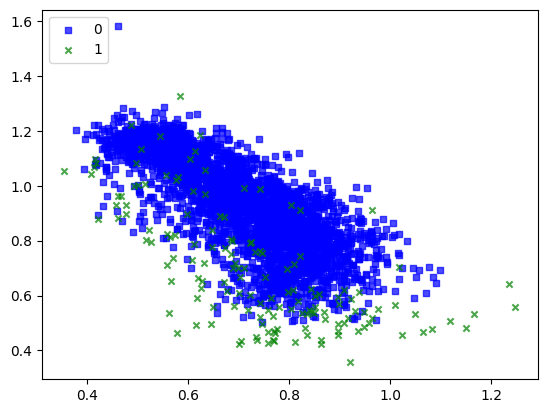

In [ ]:
from mlxtend.plotting import category_scatter

x_axis_label = 'LMacro_03|D4_ratio'
y_axis_label =  'LMacro_03|D2_ratio'

reduced_features_reset = reduced_features.reset_index()

fig = category_scatter(x=x_axis_label, y=y_axis_label, label_col='class',
                       data=reduced_features_reset, legend_loc='upper left')

feature_list = list(reduced_features.columns)

two_features_data = reduced_features.iloc[:,[feature_list.index(x_axis_label),feature_list.index(y_axis_label)]]

Tree


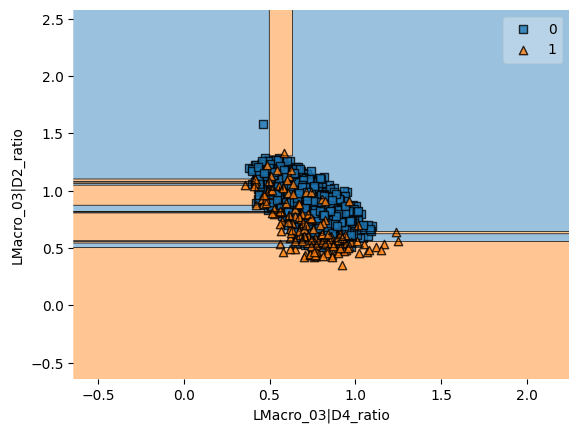

Forest


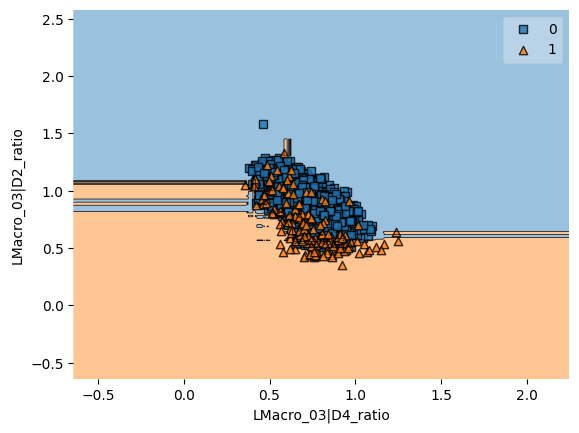

In [ ]:
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

tree = DecisionTreeClassifier(criterion='gini',
                              class_weight = 'balanced',
                              random_state=RANDOM_STATE)

tree_dict = {'Tree':tree, 'Forest':forest}

for classifier_name in tree_dict:

  tree_dict[classifier_name].fit(two_features_data.values, reduced_features_reset['class'].values)

  plot_decision_regions(two_features_data.values,
                        reduced_features_reset['class'].values,
                        clf = tree_dict[classifier_name])

  plt.xlabel(x_axis_label)
  plt.ylabel(y_axis_label)

  print(color.BOLD+color.UNDERLINE+classifier_name+color.END)
  plt.show()

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# create a forest classifier
ETSC = ExtraTreesClassifier(criterion='gini',
                            n_estimators=1000,
                            max_features = 'sqrt',
                            class_weight = 'balanced',
                            random_state=RANDOM_STATE,
                            n_jobs=-1)

ETSC.fit(X_train, y_train)

y_pred = ETSC.predict(X_val)

display(pd.DataFrame(classification_report(y_val, y_pred, output_dict = True)))

,0,1,accuracy,macro avg,weighted avg
precision,0.996283,0.857143,0.989399,0.926713,0.989891
recall,0.992593,0.923077,0.989399,0.957835,0.989399
f1-score,0.994434,0.888889,0.989399,0.941662,0.989586
support,270.000000,13.000000,0.989399,283.000000,283.000000


In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier

bal_forest = BalancedRandomForestClassifier(criterion='gini',
                                            n_estimators=1000,
                                            max_features = 'sqrt',
                                            random_state=RANDOM_STATE,
                                            n_jobs=-1
                                            )
bal_forest.fit(X_train, y_train)

y_pred = bal_forest.predict(X_val)

display(pd.DataFrame(classification_report(y_val, y_pred , output_dict = True)))

/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


,0,1,accuracy,macro avg,weighted avg
precision,1.000000,0.520000,0.957597,0.760000,0.977951
recall,0.955556,1.000000,0.957597,0.977778,0.957597
f1-score,0.977273,0.684211,0.957597,0.830742,0.963811
support,270.000000,13.000000,0.957597,283.000000,283.000000


Majority Voting

In [ ]:
%%time
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from imblearn.under_sampling import NeighbourhoodCleaningRule
from sklearn.decomposition import PCA
import timeit
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, make_scorer

clf1 = Pipeline([('scl', StandardScaler()),
                 ('clf', SVC(kernel='rbf',
                             gamma='auto',
                             random_state=RANDOM_STATE,
                             probability = True))])

clf2 = Pipeline([('scl', StandardScaler()),
                 ('clf', LogisticRegression(solver='liblinear',
                                            random_state=RANDOM_STATE))
])

clf3 = DecisionTreeClassifier(random_state=RANDOM_STATE)

clf_labels = ['SVM', # Support Vector Machine
              'LR', # LogisticRegression
              'DT'] # Decision Tree

# Majority Rule Voting
hard_mv_clf = VotingClassifier(estimators=[(clf_labels[0],clf1),
                                           (clf_labels[1],clf2),
                                           (clf_labels[2],clf3)],
                               voting='hard')

soft_mv_clf = VotingClassifier(estimators=[(clf_labels[0],clf1),
                                           (clf_labels[1],clf2),
                                           (clf_labels[2],clf3)],
                               voting='soft')

clf_labels += ['Hard Majority Voting', 'Soft Majority Voting']
all_clf = [clf1, clf2, clf3, hard_mv_clf, soft_mv_clf]

print(color.BOLD+color.UNDERLINE+'Validation Scores\n'+color.END)
for clf, label in zip(all_clf, clf_labels):
    start = timeit.default_timer() # TIME STUFF

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_val)
    scores = f1_score(y_val, y_pred)
    print(color.BOLD+label+color.END)
    print("Score: %0.3f"
          % scores)
    # TIME STUFF
    stop = timeit.default_timer()
    print("Run time:", np.round((stop-start)/60,2),"minutes")
    print()

Validation Scores

SVM
Score: 0.889
Run time: 0.04 minutes

LR
Score: 0.897
Run time: 0.03 minutes

DT
Score: 0.686
Run time: 0.05 minutes

Hard Majority Voting
Score: 0.857
Run time: 0.11 minutes

Soft Majority Voting
Score: 0.897
Run time: 0.11 minutes

CPU times: user 19.9 s, sys: 291 ms, total: 20.2 s
Wall time: 20 s


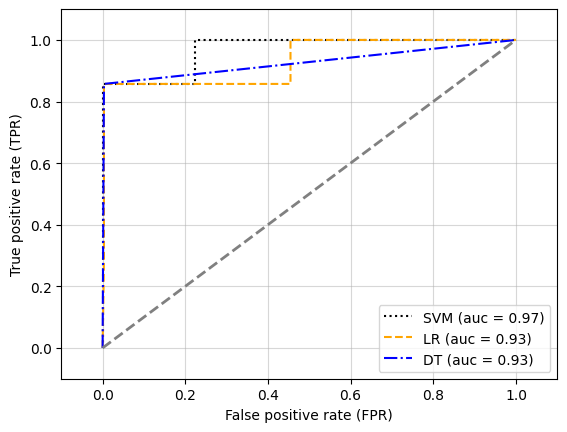

CPU times: user 7.17 s, sys: 164 ms, total: 7.33 s
Wall time: 7.31 s


In [ ]:
%%time
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# remove the hard voting because doesnt have predict proba
del clf_labels[3], all_clf[3]

colors = ['black', 'orange', 'blue', 'green']
linestyles = [':', '--', '-.', '-']
for clf, label, clr, ls \
        in zip(all_clf,
               clf_labels, colors, linestyles):

    # assuming the label of the positive class is 1
    y_pred = clf.fit(X_train,
                          y_train).predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test,
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr,
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')

#plt.savefig(os.path.join(IMAGE_DIR, 'Pipeline_Rocs.png'), dpi=300)
plt.show()

Boosting Methods

AdaBoost

In [ ]:
%%time
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

tree = DecisionTreeClassifier(criterion='gini',
                              max_depth=1,
                              random_state=RANDOM_STATE)


ada = AdaBoostClassifier(estimator=tree,
                         n_estimators=100,
                         learning_rate=0.1,
                         random_state=RANDOM_STATE)

ada.fit(X_train, y_train)

y_pred = ada.predict(X_val)

display(pd.DataFrame(classification_report(y_val, y_pred , output_dict = True)))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


,0,1,accuracy,macro avg,weighted avg
precision,1.000000,0.928571,0.996466,0.964286,0.996719
recall,0.996296,1.000000,0.996466,0.998148,0.996466
f1-score,0.998145,0.962963,0.996466,0.980554,0.996529
support,270.000000,13.000000,0.996466,283.000000,283.000000


CPU times: user 42.7 s, sys: 139 ms, total: 42.8 s
Wall time: 46.2 s


Gradient Boosting

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

tree_reg1 = DecisionTreeClassifier(max_depth=2, random_state=RANDOM_STATE)
tree_reg1.fit(X_train, y_train)

y_train2 = y_train - tree_reg1.predict(X_train)
tree_reg2 = DecisionTreeClassifier(max_depth=2, random_state=RANDOM_STATE)
tree_reg2.fit(X_train, y_train2)

y_train3 = y_train2 - tree_reg2.predict(X_train)
tree_reg3 = DecisionTreeClassifier(max_depth=2, random_state=RANDOM_STATE)
tree_reg3.fit(X_train, y_train3)

y_pred = sum(tree.predict(X_val) for tree in (tree_reg1, tree_reg2, tree_reg3))

pd.DataFrame(classification_report(y_val, y_pred , output_dict =True))

,0,1,accuracy,macro avg,weighted avg
precision,0.996269,0.800000,0.985866,0.898134,0.987253
recall,0.988889,0.923077,0.985866,0.955983,0.985866
f1-score,0.992565,0.857143,0.985866,0.924854,0.986344
support,270.000000,13.000000,0.985866,283.000000,283.000000


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(max_depth = 2, n_estimators=3,
                                 learning_rate=1.0, random_state=RANDOM_STATE)
GBC.fit(X_train, y_train)
y_pred = GBC.predict(X_val)
pd.DataFrame(classification_report(y_val, y_pred , output_dict = True))

,0,1,accuracy,macro avg,weighted avg
precision,0.996269,0.800000,0.985866,0.898134,0.987253
recall,0.988889,0.923077,0.985866,0.955983,0.985866
f1-score,0.992565,0.857143,0.985866,0.924854,0.986344
support,270.000000,13.000000,0.985866,283.000000,283.000000


In [ ]:
from sklearn.metrics import accuracy_score

GBC = GradientBoostingClassifier(max_depth = 2, n_estimators =30)
GBC.fit(X_train, y_train)

scores = [accuracy_score(y_val, y_pred)
          for y_pred in GBC.staged_predict(X_val)]
bst_n_estimators = np.argmax(scores)

GBC_best = GradientBoostingClassifier(max_depth = 2,
                                      n_estimators = bst_n_estimators,
                                      random_state = RANDOM_STATE)
GBC_best.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=2, n_estimators=9, random_state=0)

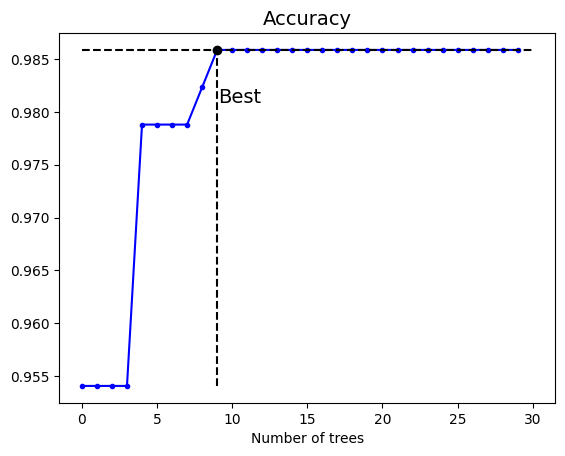

In [ ]:
worst_score = np.min(scores)
best_score = np.max(scores)

plt.plot(scores, "b.-")
plt.plot([0, 30], [best_score, best_score], "k--")
plt.plot(bst_n_estimators, best_score, "ko")
plt.plot([bst_n_estimators, bst_n_estimators], [worst_score, best_score], "k--")
plt.text(bst_n_estimators+1.5, best_score-0.005, "Best", ha="center", fontsize=14)
plt.xlabel("Number of trees")
plt.title("Accuracy", fontsize=14)

plt.show()

In [ ]:
gbrt = GradientBoostingClassifier(max_depth=2, warm_start=True, subsample = 0.5, random_state=RANDOM_STATE)

max_val_score = float(0)
score_not_going_up = 0
for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_score = accuracy_score(y_val, y_pred)
    if val_score > max_val_score:
        max_val_score = val_score
        score_not_going_up = 0
    else:
        score_not_going_up += 1
        if score_not_going_up == 5:
            break  # early stopping

print("Number of estimators:", gbrt.n_estimators)
print("Maximum Accuracy:", max_val_score)

Number of estimators: 10
Maximum Accuracy: 0.9858657243816255


XgBoost

In [ ]:
from xgboost import XGBClassifier

%timeit XGBClassifier(n_estimators =10, random_state=RANDOM_STATE).fit(X_train, y_train)

1.3 s ± 412 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%timeit AdaBoostClassifier(n_estimators =10, random_state=RANDOM_STATE).fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

4.68 s ± 1.09 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%timeit GradientBoostingClassifier(n_estimators =10, random_state=RANDOM_STATE).fit(X_train, y_train)

11.1 s ± 720 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
XGmodel = XGBClassifier(max_depth = 3,
                        learning_rate = 0.1,
                        n_estimators=500,
                        booster = 'gbtree',
                        n_jobs =-1,
                        random_state=RANDOM_STATE)

XGmodel.fit(X_train, y_train)

y_pred = XGmodel.predict(X_val)

display(pd.DataFrame(classification_report(y_val, y_pred , output_dict = True)))

,0,1,accuracy,macro avg,weighted avg
precision,1.000000,0.928571,0.996466,0.964286,0.996719
recall,0.996296,1.000000,0.996466,0.998148,0.996466
f1-score,0.998145,0.962963,0.996466,0.980554,0.996529
support,270.000000,13.000000,0.996466,283.000000,283.000000
